# Classification

#### NOTE: THE RUNTIME OF THIS SCRIPT IS AROUND 20 MINUTES

In [1]:
#import revelant modules
import pandas as pd
from pandas import DataFrame
import re
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
except:
    !pip install seaborn
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
#read both training and testing data sets and put into dataframe objects
training_data = pd.read_csv("income-training.csv")
test_data  = pd.read_csv("income-testing.csv")

#### New Feature 
Create a new feature called "Negative_Investment" based on the "CapitalGain" and "CaptitalLoss" values.
eg. If the CapitalGain is less than CapitalLoss then assign 1, which is a reprensentation of negative invetment

In [3]:
#New feature is added to the end of orignal dataframe as a new column with 1 as yes and 0 as no
training_data['Negative_Investment'] = np.where((training_data['CapitalGain'] < training_data['CapitalLoss']), 1, 0) 
test_data['Negative_Investment'] = np.where((test_data['CapitalGain'] < test_data['CapitalLoss']), 1, 0) 

In [4]:
#print both datasets information, so we can check how many line items we have and if any empty cells
print(training_data.info())
print("\n=======================================\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24421 entries, 0 to 24420
Data columns (total 16 columns):
Age                    24421 non-null int64
WorkClass              23037 non-null object
FinalWeight            24421 non-null int64
Education              24421 non-null object
EducationLvl           24421 non-null int64
MaritalStatus          24421 non-null object
Occupation             23031 non-null object
Relationship           24421 non-null object
Race                   24421 non-null object
Sex                    24421 non-null object
CapitalGain            24421 non-null int64
CapitalLoss            24421 non-null int64
HoursPerWeek           24421 non-null int64
NativeCountry          24026 non-null object
IncomeBracket          24421 non-null object
Negative_Investment    24421 non-null int64
dtypes: int64(7), object(9)
memory usage: 3.0+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 16 columns):
Age         

Only "WorkClass", "Occupation", "NativeCountry" have empty cells.
Reasons behind these empty cells for Occupation and WorkClass maybe due to the fact that these people are currently
unemployeded thus leaving these two columns blank, while the absent information of "NativeCountry" may be explained by the hesitations that some people have to disclose their Native Country for security reasons.

#### High Level Summary
training_data:

               24421 rows in total;
               1384 empty cells for WorkClass;
               1390 empty cells for Occupation;
               395 empty cells for NativeCountry;
test_data:

               12211 rows in total;
               688 empty cells for WorkClass;
               690 empty cells for Occupation;
               225 empty cells for NativeCountry;
As these are all categorical data, I will find out the mode for each and fill in the empty cells with the modes.
The effect it can bring in is making the mode more significant eg, the feature key becomes more apparent or statistically significant. However, comparing to the totoal number of rows/datapoints we have, the number of missing values for each feature is insignificant so it may not produce a very pronounced drawback, but will help us better capture the most significant(mode) key thus helping to prepare the model.

In [5]:
#define a clean function that will fill in empty cells and convert categorical data to numerical data
def clean(df):
    
    #find out the mode for each feature
    WorkClass_mode = df.WorkClass.mode().to_string(index=False)
    Occupation_mode = df.Occupation.mode().to_string(index=False)
    NativeCountry_mode = df.NativeCountry.mode().to_string(index=False)

    #fill in the mode values to each empty cell for each feature
    df.set_value(df.WorkClass.isnull(), 'WorkClass', WorkClass_mode)
    df.set_value(df.Occupation.isnull(), 'Occupation', Occupation_mode)
    df.set_value(df.NativeCountry.isnull(), 'NativeCountry', NativeCountry_mode)
    
    #drop unnecessary columns
    df.drop(labels=['FinalWeight','Education','CapitalGain','CapitalLoss','HoursPerWeek'], axis=1, inplace=True)

    #convert categorical data to numerical data using dummies
    dummies_WorkClass = pd.get_dummies(df['WorkClass'],prefix='WorkClass')
    dummies_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix= 'MaritalStatus') 
    dummies_Occupation = pd.get_dummies(df['Occupation'], prefix= 'Occupation')
    dummies_Relationship = pd.get_dummies(df['Relationship'], prefix= 'Relationship')
    dummies_Race = pd.get_dummies(df['Race'], prefix= 'Race') 
    dummies_Sex = pd.get_dummies(df['Sex'], prefix= 'Sex')
    dummies_NativeCountry = pd.get_dummies(df['NativeCountry'], prefix= 'NativeCountry')
    #dummies_Negative_Investment = pd.get_dummies(df['Negative_Investment'], prefix= 'Negative_Investment')
    
    #add new dummy columns to the original dataframe
    df = pd.concat([df, dummies_WorkClass, dummies_MaritalStatus, dummies_Occupation, dummies_Relationship, \
                    dummies_Race, dummies_Sex, dummies_NativeCountry], axis=1)
    #drop orignal categorial data columns so we will be using those numerial dummies
    df = df.drop(['WorkClass','MaritalStatus','Occupation', 'Relationship', 'Race', 'Sex', \
                  'NativeCountry'], axis=1)

    return df

#### Cleaning Strategy Motivations

##### Missing Values
As I previously exmaplined, I got rid of the missing values by replace them with the mode values and because the number is not as significant as the totoal number of data samples we have so the drawback will not be that pronounced. Yet it may make it easier for the model to extract the most signifcant feature key.

##### Dropped Features and New Feature
I dropped'FinalWeight'because it may not be obviously useful to my model, the'HoursPerWeek' may not be useful as it depends on some occupation so some occupation may only need to work for a few hours to make a lot of money while the others only pay a little even though work for a extended period of time. The'Education' is dropped because another column "EducationLvl" can represent the same information but with categorical data already. Finally, the 'CapitalGain' and 'CapitalLoss'are dropped and replaced with a new feature column "Negative_Investment" with numerical values

In [6]:
#run the clean function to both training and testing data sets
training_data = clean(training_data)
test_data = clean(test_data)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


#### Note: I did not convert IncomeBracket to numerical data, because it is our target variable, the model does not need it to build the model so it will be handled separately later. It can be done, however, just not necessary.

In [7]:
#show the first 5 rows of training set
training_data.head()

,Age,EducationLvl,IncomeBracket,Negative_Investment,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,...,NativeCountry_Portugal,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia
0,42,10,<50K,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,28,10,<50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,24,10,50-100K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,32,5,<50K,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,55,14,<50K,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [8]:
#show the first 5 rows of testing set
test_data.head()

,Age,EducationLvl,IncomeBracket,Negative_Investment,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,...,NativeCountry_Portugal,NativeCountry_Puerto-Rico,NativeCountry_Scotland,NativeCountry_South,NativeCountry_Taiwan,NativeCountry_Thailand,NativeCountry_Trinadad&Tobago,NativeCountry_United-States,NativeCountry_Vietnam,NativeCountry_Yugoslavia
0,57,10,50-100K,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,35,13,<50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,26,13,<50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,13,<50K,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,21,9,<50K,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)
/Applications/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


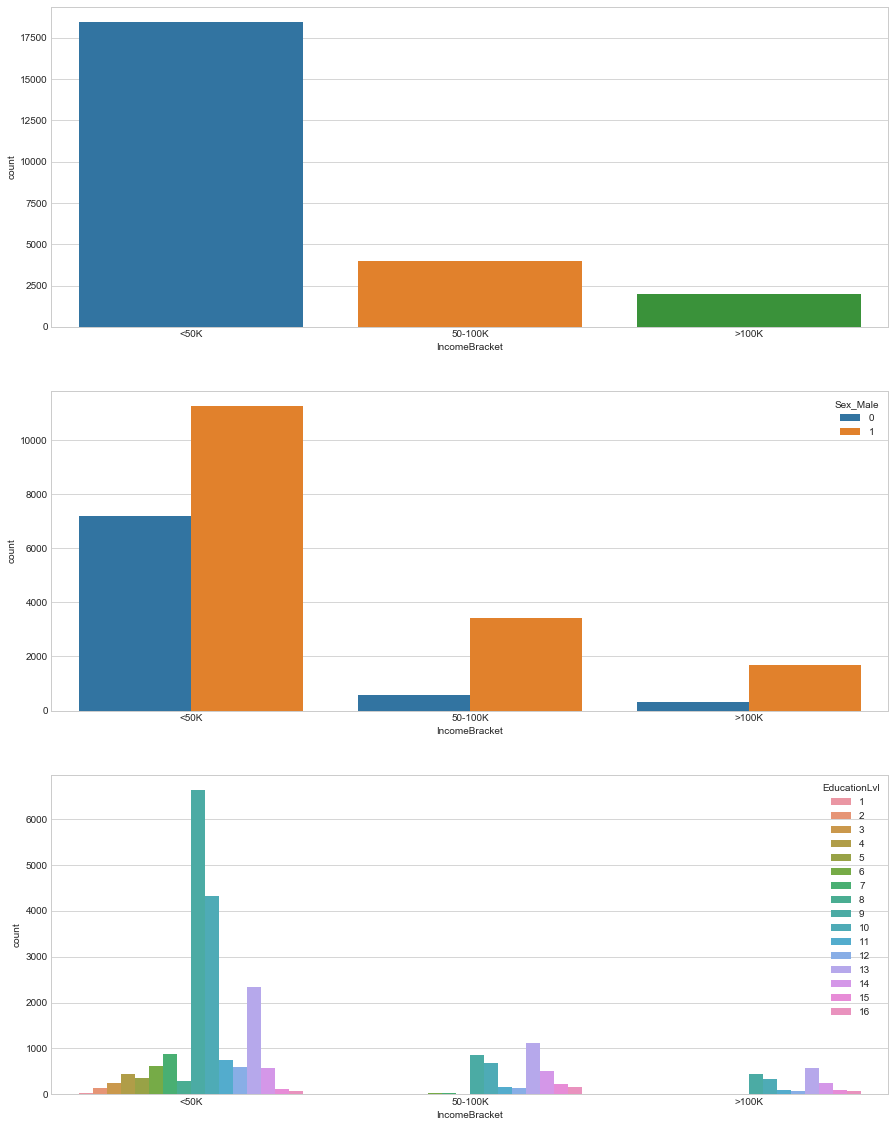

In [9]:
#setup the plot and plot 3 graphs from the training data set
fig, (axis1,axis2,axis3) = plt.subplots(3,1,figsize=(15,20))

sns.countplot(x='IncomeBracket', data=training_data, ax=axis1)
sns.countplot(x='IncomeBracket', hue="Sex_Male", data=training_data, ax=axis2)
sns.countplot(x='IncomeBracket', hue="EducationLvl", data=training_data, ax=axis3)

#### Graph Discussion
Graph1: the plot shows the general demographical distribution of people's income, from the graph it shows that the majority of people are in the < 50K IncomeBracket range, this will help us understand the trend and develop an expectation of the data analysis that most people should fall into this category.

Graph2: this plot invesitigate the gender distribution among all three incomebrackets, across all IncomeBracket range, there is always more male than female, this plotentially may reveal and that there are more male in the workplace than female and both male and female have more people making less than 50K.

Graph3: the plot shows the occupation distribution among all three icomebrackets, we can see both highly eduacated and less educated people making < 50K but to be able to make > 100K, one most likely is highly educated. The information gathered here gave us before-hand expections of the outcomes of the data classification, that highly eduacated people with advanced occupation are likely to make a lot more money.

#### Principal components analysis (PCA) to visualize feature improtance

In [10]:
#Seperate the target varaible - "IncomeBracket" column from the orignal dataframe
#Put them into feature objects and target object to prepare for subsequent analysis
training_data_features=training_data.drop(['IncomeBracket'], axis=1).values
training_data_targets=training_data.IncomeBracket.values

In [11]:
#import revelant modules
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
#since some features are measured in different scales, I normalized them first
training_data_features_std = StandardScaler().fit_transform(training_data_features)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
#find the covariance matrix, eigenvalue/eigenvectors of the features
cov_mat = np.cov(training_data_features_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [14]:
#rank each eigen values and get each individual explained varaince
tot = sum(eig_vals)
var_exp = [round((i / tot)*100, 3) for i in sorted(eig_vals, reverse=True)]
#compute an accumlated explained variance
cum_var_exp = np.cumsum(var_exp)

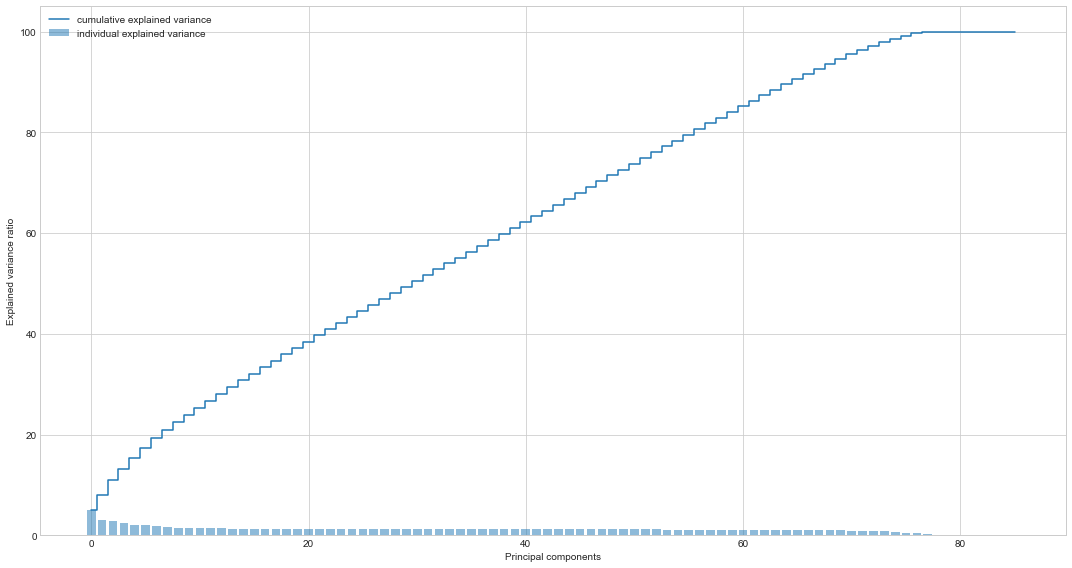

In [15]:
#plot the individual explained varaince and accumlated explained variance
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(15, 8))

    plt.bar(range(86), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(86), cum_var_exp, where='mid',
             label='cumulative explained variance')
    
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

#### Feature Importance Explanation and Selection Justifications
#Depends on the goal of how much explained covariance you want to get, we can pick how many principal components we want to use. In this case, the first 5 principal components may explain about 20% which is bad, however, to get 80% of explained covariance, we need to have around 55 principal compoents which is not a whole lot improvment from the original total of 86  features that would gave us 100% explained covaraince. As a general rule of thumb, I will use 55 principal components to achieve a 80% explained covariance. From the individual explained varaince values, it can be concluded that Age and EducationLv are most related to an individual's incomebracket.

In [16]:
#pick the number of principle components to be used as 55
#fit and transform PCA and print out the explained varaince ratios
pca = PCA(n_components=55)
traning_data_pca = pca.fit_transform(training_data_features_std)
print ('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.05008886  0.02976867  0.02912312  0.02354502  0.02105475  0.02026472
  0.01856753  0.01639417  0.01540354  0.0144346   0.01434858  0.01419317
  0.01351854  0.01339128  0.01323561  0.01309324  0.01288784  0.01275413
  0.01264791  0.0125775   0.01246727  0.01231747  0.0121576   0.01213756
  0.01207933  0.01196086  0.01187757  0.01182707  0.01173664  0.01171752
  0.01169825  0.01166398  0.01165473  0.01164988  0.01164651  0.01164293
  0.01164168  0.01163686  0.01163004  0.0116254   0.01161141  0.01160235
  0.01159062  0.0115866   0.01156339  0.01155205  0.01151368  0.01147721
  0.01143415  0.01140399  0.01137909  0.01133023  0.01127789  0.0112136
  0.01116254]


#### Feature Selection Discussion
Up to this point, I have cleaned the data(fill missing values and convert categorical data to numerical values), dropped unnecessary features, added a new feature based on other features and selected important fetures to be used for subsequent analysis. Feature engineering is useful as better features means better results from the model, also it simplify the model and thus reducing processing time and yields better flexibility. 

#### Model Implementation

In [17]:
#import machine learning modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
try:
    from sklearn.model_selection import GridSearchCV
except:
    from sklearn.grid_search import GridSearchCV
try:
    from sklearn.model_selection import learning_curve
except:
    from sklearn.learning_curve import learning_curve

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
#X is the features selected using PCA with 55 principal components
#y is the target varaible - incomebracket
X = traning_data_pca
y = training_data_targets

In [19]:
#split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [20]:
#define a 10 kfold function
def run_kfold(clf):
    
    #run KFold with 10 folds instead of the default 3
    #on the 24421 records in the training_data
    kf = KFold(24421, n_folds=10)
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf:
        fold += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        #using accurancy score
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
    
    #compute an average accurancy score of the 10 results
    mean_outcome = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome)) 

#### Model 1 - Random Forest Classifier
Model tunning included using Grid_Search to try out differnt parameter combinations
and find out the best set of paramaters and use it for the final model

In [21]:
# Choose the type of classifier. 
rdc = RandomForestClassifier()

# Choose some parameter combinations to try
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Use accuracy_score for comparing different parameter combinations. 
acc_scorer_rdc = make_scorer(accuracy_score)

# Run the grid search for the Random Forest classifier
grid_obj_rdc = GridSearchCV(rdc, parameters, scoring=acc_scorer_rdc)
grid_obj_rdc = grid_obj_rdc.fit(X_train, y_train)

# Set our classifier, rdc, to the have the best combination of parameters
rdc = grid_obj_rdc.best_estimator_

# Fit the selected classifier to the training data
rdc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
#predict the results for X_test and print out the accuracy score
predictions_rdc = rdc.predict(X_test)
print(accuracy_score(y_test, predictions_rdc))

0.782994404258


In [23]:
#run a seprated kfold with the model at its best estimator
run_kfold(rdc)

Fold 1 accuracy: 0.7830536225951699
Fold 2 accuracy: 0.7858312858312858
Fold 3 accuracy: 0.7800982800982801
Fold 4 accuracy: 0.8001638001638002
Fold 5 accuracy: 0.7952497952497952
Fold 6 accuracy: 0.7895167895167895
Fold 7 accuracy: 0.7858312858312858
Fold 8 accuracy: 0.7866502866502867
Fold 9 accuracy: 0.7895167895167895
Fold 10 accuracy: 0.7731367731367731
Mean Accuracy: 0.7869048708590256


#### Random Forest Classifier Discussion
K-fold shows little variaitions accoress the folds so the accruacy is stable around the mean at 78%
Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object. Pros: reduced variance (relative to regular trees) Cons: not as easy to visually interpret. I chose this one to compare against other classifier and it is easy to implememnt and useful.

#### Model 2 - Logistic Regression
Model tunning included using Grid_Search to try out differnt parameter combinations
and find out the best set of paramaters and use it for the final model

In [24]:
# Choose the type of classifier. 
lg = LogisticRegression(random_state=42, penalty='l1')
parameters = {'C':[0.5]}

# Use classification accuracy to compare parameter combinations
acc_scorer_lg = make_scorer(accuracy_score)

# Run a grid search for the Logistic Regression classifier and all the selected parameters
grid_obj_lg = GridSearchCV(lg, parameters, scoring=acc_scorer_lg)
grid_obj_lg = grid_obj_lg.fit(X_train, y_train)

# Set our classifier, lg, to have the best combination of parameters
lg = grid_obj_lg.best_estimator_

# Fit the selected classifier to the training data. 
lg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
#predict the results for X_test and print out the accuracy score
predictions_lg = lg.predict(X_test)
print(accuracy_score(y_test, predictions_lg))

0.786542923434


In [26]:
#run a seprated kfold with the model at its best estimator
run_kfold(lg)

Fold 1 accuracy: 0.7900122799836267
Fold 2 accuracy: 0.7821457821457821
Fold 3 accuracy: 0.7788697788697788
Fold 4 accuracy: 0.7968877968877969
Fold 5 accuracy: 0.7948402948402948
Fold 6 accuracy: 0.7948402948402948
Fold 7 accuracy: 0.7825552825552825
Fold 8 accuracy: 0.778050778050778
Fold 9 accuracy: 0.7866502866502867
Fold 10 accuracy: 0.782964782964783
Mean Accuracy: 0.7867817357788705


#### Logistic Regression Classifier Discussion
K-fold shows little variaitions accoress the folds so the accruacy is stable around the mean at 78%
Logistic Regression Predicts Probabilities so it predict how likely a particulate sample belong to a certain class by calculating the probobility for each class and then pick the highest. Pros: low variance Cons: high bias. I chose this one to compare against other classifier and it is easy to implememnt and useful.

#### Model 3 - K-Nearest Neighbors
Model tunning included using Grid_Search to try out differnt parameter combinations
and find out the best set of paramaters and use it for the final model

In [27]:
#import module
import sklearn.neighbors

In [28]:
# Choose the type of classifier. 
knn = sklearn.neighbors.KNeighborsClassifier()

k = np.arange(20)+1
parameters = {'n_neighbors': k}

# Use classification accuracy to compare parameter combinations
acc_scorer_knn = make_scorer(accuracy_score)

# Run a grid search for the K-Nearest Neighbors classifier and all the selected parameters
grid_obj_knn = GridSearchCV(knn, parameters, scoring=acc_scorer_knn)
grid_obj_knn = grid_obj_knn.fit(X_train, y_train)

# Set our classifier, knn, to have the best combination of parameters
knn = grid_obj_knn.best_estimator_

# Fit the selected classifier to the training data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [29]:
#predict the results for X_test and print out the accuracy score
predictions_knn = knn.predict(X_test)
print(accuracy_score(y_test, predictions_knn))

0.782039033711


In [30]:
#run a seprated kfold with the model at its best estimator
run_kfold(knn)

Fold 1 accuracy: 0.7777322963569382
Fold 2 accuracy: 0.7870597870597871
Fold 3 accuracy: 0.769041769041769
Fold 4 accuracy: 0.7977067977067978
Fold 5 accuracy: 0.7911547911547911
Fold 6 accuracy: 0.7841932841932842
Fold 7 accuracy: 0.7854217854217854
Fold 8 accuracy: 0.782964782964783
Fold 9 accuracy: 0.7858312858312858
Fold 10 accuracy: 0.7723177723177723
Mean Accuracy: 0.7833424352048994


####  K-Nearest Neighbors Classifier Discussion
K-fold shows little variaitions accoress the folds so the accruacy is stable around the mean at 78%
K-nearest neighbor classifier essentially formes a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. Pros: simple to understand and easy to implement. Cons: computationally expensive. I chose this one to compare against other classifier and it is easy to implememnt and useful.

#### Model 4 - Decision Tree
Model tunning included using Grid_Search to try out differnt parameter combinations
and find out the best set of paramaters and use it for the final model

In [31]:
#import module
from sklearn import tree

In [32]:
# Choose the type of classifier. 
tre = tree.DecisionTreeClassifier()

parameters = {'criterion':['gini','entropy'], \
              'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

# Use classification accuracy to compare parameter combinations
acc_scorer_tre = make_scorer(accuracy_score)

# Run a grid search for the Decision Tree classifier and all the selected parameters
grid_obj_tre = GridSearchCV(tre, parameters, scoring=acc_scorer_tre)
grid_obj_tre = grid_obj_tre.fit(X_train, y_train)

# Set our classifier, tre, to have the best combination of parameters
tre = grid_obj_tre.best_estimator_

# Fit the selected classifier to the training data. 
tre.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [33]:
#predict the results for X_test and print out the accuracy score
predictions_tre = tre.predict(X_test)
print(accuracy_score(y_test, predictions_tre))

0.785178108366


In [34]:
#run a seprated kfold with the model at its best estimator
run_kfold(tre)

Fold 1 accuracy: 0.7851002865329513
Fold 2 accuracy: 0.7825552825552825
Fold 3 accuracy: 0.7698607698607699
Fold 4 accuracy: 0.7923832923832924
Fold 5 accuracy: 0.7923832923832924
Fold 6 accuracy: 0.785012285012285
Fold 7 accuracy: 0.7825552825552825
Fold 8 accuracy: 0.7800982800982801
Fold 9 accuracy: 0.7854217854217854
Fold 10 accuracy: 0.778050778050778
Mean Accuracy: 0.7833421334853999


####  Decision Tree Classifier Discussion
K-fold shows little variaitions accoress the folds so the accruacy is stable around the mean at 78%
The decision tree is used to visually and explicitly represent decisions and decision making. It uses a tree-like model of decisions. So growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop. Pros: easy to interpret visually when the trees only contain several levels. Cons: prone to overfitting. I chose this one to compare against other classifier and it is easy to implememnt and useful.

#### Accuracy Across Models
The Accurancy Scores show that the best classifiers are Random Forest Classifier and Logistic Regression with an overall accurancy of 78.7%

#### Performance measurements and why different measurements?
The measurements investigated here for the four models are: Accuracy, True Positive Rate and False Positive Rate.
The accuracy alone is not always a good indicator of how good a classfier is so I use 2 additinal measurements.

The False Positive Rate refers to the probability of falsely rejecting the null hypothesis for a particular test so we want it to be low, while True Positive Rate measures the proportion of positives that are correctly identified so we need it to be high.

In [35]:
#import module
from sklearn import metrics

In [36]:
#Define a function to find the confusion matrix for computing False Positive Rate and True Positive Rate
def find_matrx (confu):
    
    FP = confu.sum(axis=0) - np.diag(confu)  
    FN = confu.sum(axis=1) - np.diag(confu)
    TP = np.diag(confu)
    TN = confu.sum() - (FP + FN + TP)
    
    true_positive_rate = TP.sum()/float((TP+FN).sum())
    false_positive_rate = FP.sum() / float((TN + FP).sum())
    
    return ('True Positive Rate = %f' %true_positive_rate, 'False Positive Rate= %f' %false_positive_rate)

#### Model 1 - Random Forest Classifier

In [37]:
confusion_rdc = metrics.confusion_matrix(y_test, predictions_rdc)
pd.DataFrame(confusion_rdc, \
             columns=['Predicted Class <50K', 'Predicted Class 50-100K', 'Predicted Class >100K'], \
             index=['True Class <50K', 'True Class 50-100K', 'True Class >100K'])

,Predicted Class <50K,Predicted Class 50-100K,Predicted Class >100K
True Class <50K,463,729,7
True Class 50-100K,273,5270,9
True Class >100K,233,339,4


In [38]:
print (find_matrx(confusion_rdc))
print ('Overall accuracy = %f'%accuracy_score(y_test, predictions_rdc))

('True Positive Rate = 0.782994', 'False Positive Rate= 0.108503')
Overall accuracy = 0.782994


#### Model 2 - Logistic Regression

In [39]:
mconfusion_lg = metrics.confusion_matrix(y_test, predictions_lg)
pd.DataFrame(mconfusion_lg, \
             columns=['Predicted Class <50K', 'Predicted Class 50-100K', 'Predicted Class >100K'], \
             index=['True Class <50K', 'True Class 50-100K', 'True Class >100K'])

,Predicted Class <50K,Predicted Class 50-100K,Predicted Class >100K
True Class <50K,511,684,4
True Class 50-100K,302,5248,2
True Class >100K,263,309,4


In [40]:
print (find_matrx(mconfusion_lg))
print ('Overall accuracy = %f'%accuracy_score(y_test, predictions_lg))

('True Positive Rate = 0.786543', 'False Positive Rate= 0.106729')
Overall accuracy = 0.786543


#### Model 3 - K-NN

In [41]:
mconfusion_knn = metrics.confusion_matrix(y_test, predictions_knn)
pd.DataFrame(mconfusion_knn, \
             columns=['Predicted Class <50K', 'Predicted Class 50-100K', 'Predicted Class >100K'], \
             index=['True Class <50K', 'True Class 50-100K', 'True Class >100K'])

,Predicted Class <50K,Predicted Class 50-100K,Predicted Class >100K
True Class <50K,522,657,20
True Class 50-100K,344,5192,16
True Class >100K,251,309,16


In [42]:
print (find_matrx(mconfusion_knn))
print ('Overall accuracy = %f'%accuracy_score(y_test, predictions_knn))

('True Positive Rate = 0.782039', 'False Positive Rate= 0.108980')
Overall accuracy = 0.782039


#### Model 4 - Decision Tree

In [43]:
mconfusion_tre = metrics.confusion_matrix(y_test, predictions_tre)
pd.DataFrame(mconfusion_tre, \
             columns=['Predicted Class <50K', 'Predicted Class 50-100K', 'Predicted Class >100K'], \
             index=['True Class <50K', 'True Class 50-100K', 'True Class >100K'])

,Predicted Class <50K,Predicted Class 50-100K,Predicted Class >100K
True Class <50K,505,694,0
True Class 50-100K,304,5248,0
True Class >100K,253,323,0


In [44]:
print (find_matrx(mconfusion_tre))
print ('Overall accuracy = %f'%accuracy_score(y_test, predictions_tre))

('True Positive Rate = 0.785178', 'False Positive Rate= 0.107411')
Overall accuracy = 0.785178


#### Performace Measurements Conclusion
The Overall Accuracy scores and the True Positive Rate show that the Logistic Regression Classifier is the best with 78.7% accuracy and 78.7% True Positive Rate and a moderate low False Positive Rate of 10.67%. However, Random Forest classifier also has a very similar perfermace result with 78.3% accuracy and True Positive Rate and a 10.85% low False Positive Rate
Therefore, I will use both the Random Forest Classifier and Logistic Regression Classifier at their best parameters for the testing set.

### Testing

In [45]:
#Seperate the target varaible - "IncomeBracket" column from the orignal dataframe
#Put them into feature objects and target object to prepare for subsequent analysis
test_data_features=test_data.drop(['IncomeBracket'], axis=1).values
test_data_targets=test_data.IncomeBracket.values

In [46]:
#Normalize the feature values as they were measured in differnt scales
test_data_features_std = StandardScaler().fit_transform(test_data_features)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
#Similarly, using 55 PCA principal components to get features from the featuture objects
pca_test = PCA(n_components=55)
test_data_pca = pca_test.fit_transform(test_data_features_std)

In [48]:
#all 55 PCA principal components are used as the predictors/features
#y-all the incomebracket values are the target
X = test_data_pca
y = test_data_targets

In [49]:
#Using the trained Random Forest Classifier at its best parameters to predict and print the score 
predictions_rdc_test = rdc.predict(X)
print(accuracy_score(y, predictions_rdc_test))

0.749160592908


In [50]:
#Using my trained optimal model - Logistic Regression Classifier at its best parameters to predict and print the score 
predictions_lg_test = lg.predict(X)
print(accuracy_score(y, predictions_lg_test))

0.765211694374


#### Testing Discussion
As previously explained, I picked the Logistic Regression Classifier as my optimal model, however, since the Random Forest Classifier had a very similar performace, I used both Logistic Regression and Random Forest for the final testing.

Model performace - Logistic Regression Model accurancy score droped from 78.7% down to 76.5%, while the Random Forest Classifier droped from 78.3% down to 74.9%. The accuracy decreases are expected because the models were built using a different set of data, the model may represent that dataset well but it may be limited in describing a new set of data. Regardless, the smaller decrease of accuracy with Logistic Regression Model futher indicated that the Logistic Regression is a better classifier in this case.